In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('dataset2.csv')

In [4]:
print(data.info())
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864056 entries, 0 to 2864055
Data columns (total 33 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   activityID                 object 
 1   heart_rate                 float64
 2   hand temperature (°C)      float64
 3   hand acceleration X ±16g   float64
 4   hand acceleration Y ±16g   float64
 5   hand acceleration Z ±16g   float64
 6   hand gyroscope X           float64
 7   hand gyroscope Y           float64
 8   hand gyroscope Z           float64
 9   hand magnetometer X        float64
 10  hand magnetometer Y        float64
 11  hand magnetometer Z        float64
 12  chest temperature (°C)     float64
 13  chest acceleration X ±16g  float64
 14  chest acceleration Y ±16g  float64
 15  chest acceleration Z ±16g  float64
 16  chest gyroscope X          float64
 17  chest gyroscope Y          float64
 18  chest gyroscope Z          float64
 19  chest magnetometer X       float64
 20  ch

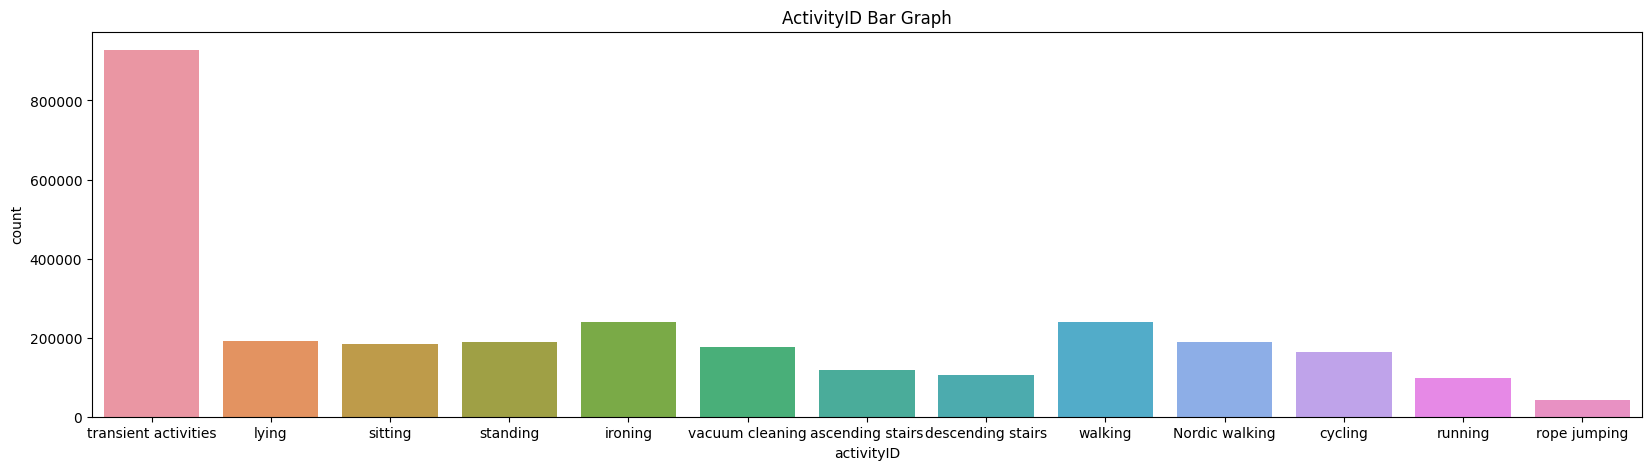

In [4]:
#plot the activityID bar on bar graph 
plt.figure(figsize=(20,5))
sns.countplot(x='activityID',data=data)
plt.title('ActivityID Bar Graph')
plt.show()


In [5]:
#check for missing values
print(data.isnull().sum())


activityID                    0
heart_rate                   46
hand temperature (°C)         0
hand acceleration X ±16g      0
hand acceleration Y ±16g      0
hand acceleration Z ±16g      0
hand gyroscope X              0
hand gyroscope Y              0
hand gyroscope Z              0
hand magnetometer X           0
hand magnetometer Y           0
hand magnetometer Z           0
chest temperature (°C)        0
chest acceleration X ±16g     0
chest acceleration Y ±16g     0
chest acceleration Z ±16g     0
chest gyroscope X             0
chest gyroscope Y             0
chest gyroscope Z             0
chest magnetometer X          0
chest magnetometer Y          0
chest magnetometer Z          0
ankle temperature (°C)        0
ankle acceleration X ±16g     0
ankle acceleration Y ±16g     0
ankle acceleration Z ±16g     0
ankle gyroscope X             0
ankle gyroscope Y             0
ankle gyroscope Z             0
ankle magnetometer X          0
ankle magnetometer Y          0
ankle ma

In [25]:
prev=""
for i in data["activityID"]:
    print(prev)
    print(i)
    if i==prev:
        print("yes")
        prev=i
    else:
        print("no")
        prev=i
        
    if i=="lying":
        break


transient activities
no
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient activities
transient activities
yes
transient

In [6]:
prev=""
list=[]
for i in range(0,len(data)):
    if data["activityID"].loc[i]==prev:
        prev=data["activityID"].loc[i]
    else:
        print(data["activityID"].loc[i])
        prev=data["activityID"].loc[i]
        print(i)
        list.append(i)
print(list)
    

transient activities
0
lying
2928
sitting
30115
standing
53595
transient activities
75312
ironing
84967
transient activities
108540
vacuum cleaning
118760
transient activities
141701
ascending stairs
154281
transient activities
162401
descending stairs
173396
transient activities
180876
ascending stairs
184562
descending stairs
192332
transient activities
199751
walking
223759
transient activities
246012
Nordic walking
253175
transient activities
273440
cycling
283096
transient activities
306671
running
312742
transient activities
334007
rope jumping
348888
transient activities
361800
lying
381373
transient activities
404803
sitting
411069
transient activities
433414
standing
435441
transient activities
461017
ironing
466661
transient activities
495541
vacuum cleaning
503631
transient activities
524314
ascending stairs
549270
transient activities
557995
descending stairs
567978
transient activities
575769
ascending stairs
618764
descending stairs
627381
transient activities
634803
walk

In [7]:
print(len(list))

193


In [8]:
dataframe=[i for i in range(len(list))]
for i in range(1,len(list)):
    #print(i)
    #print(data.iloc[list[i-1]:list[i],:])
    dataframe[i-1] = data.iloc[list[i-1]:list[i],:]
    

In [9]:
print(dataframe[100])


              activityID  heart_rate  hand temperature (°C)  \
1534886  vacuum cleaning        88.0                35.4375   
1534887  vacuum cleaning        88.0                35.4375   
1534888  vacuum cleaning        88.0                35.4375   
1534889  vacuum cleaning        88.0                35.4375   
1534890  vacuum cleaning        88.0                35.4375   
...                  ...         ...                    ...   
1559326  vacuum cleaning       101.0                35.2500   
1559327  vacuum cleaning       101.0                35.2500   
1559328  vacuum cleaning       101.0                35.2500   
1559329  vacuum cleaning       101.0                35.2500   
1559330  vacuum cleaning       101.0                35.2500   

         hand acceleration X ±16g  hand acceleration Y ±16g  \
1534886                   4.33038                   9.07496   
1534887                   4.20899                   9.07382   
1534888                   4.20793                   8.

In [69]:
#build a svm model 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
""""
#get rid of NaN values 
data=data.dropna()

#split the data into train and test
y=data["activityID"]
X=data.drop(["activityID"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#build the model
model=SVC()
model.fit(X_train,y_train)

#predict the model
y_pred=model.predict(X_test)

#check the accuracy
print(accuracy_score(y_test,y_pred))
"""

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data=pd.read_csv('dataset2.csv')
data=data.dropna()

#sample 20 percent of data
data=data.sample(frac=0.005)
print(data.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 14320 entries, 113929 to 2253775
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activityID                 14320 non-null  object 
 1   heart_rate                 14320 non-null  float64
 2   hand temperature (°C)      14320 non-null  float64
 3   hand acceleration X ±16g   14320 non-null  float64
 4   hand acceleration Y ±16g   14320 non-null  float64
 5   hand acceleration Z ±16g   14320 non-null  float64
 6   hand gyroscope X           14320 non-null  float64
 7   hand gyroscope Y           14320 non-null  float64
 8   hand gyroscope Z           14320 non-null  float64
 9   hand magnetometer X        14320 non-null  float64
 10  hand magnetometer Y        14320 non-null  float64
 11  hand magnetometer Z        14320 non-null  float64
 12  chest temperature (°C)     14320 non-null  float64
 13  chest acceleration X ±16g  14320 non-nu

In [9]:

y=data["activityID"]
X=data.drop(["activityID"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#build the model
model=SVC()
model.fit(X_train,y_train)

#predict the model
y_pred=model.predict(X_test)
print(y_pred)
print(y_test)
#check the accuracy
print(accuracy_score(y_test,y_pred))

#check confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


['transient activities' 'sitting' 'transient activities' ...
 'transient activities' 'transient activities' 'standing']
2854086    transient activities
1821405                 sitting
246058     transient activities
2445804    transient activities
475142                  ironing
                   ...         
763943     transient activities
2149610    transient activities
618162     transient activities
958214          vacuum cleaning
2312360    transient activities
Name: activityID, Length: 4296, dtype: object
0.6485102420856611
[[  39    0    4    0    1    0    0    1    0    0  260    0   10]
 [   0    4    2    0    4    0    0    2    0    1  143    0    8]
 [   0    0  191    0    0    0    0    0    0    0   22    0    0]
 [   1    1    7    1    4    0    1    0    0    2  141    2    5]
 [   0    0    2    0  330    0    0    0    2    0   46    0    0]
 [   0    0    0    0    2  249    0    0    0    0   15    1    0]
 [   0    1    0    0    0    0   27   12    0    0   2

'\nplt.subplot(4,4,2)\nplt.hist(data[data["activityID"]=="ascending stairs"]["heart_rate"],bins=20)\nplt.title("Heart Rate Histogram for ascending stairs")\nplt.xlabel("Heart Rate")\nplt.ylabel("Frequency")\nplt.subplot(4,4,3)\nplt.hist(data[data["activityID"]=="cycling"]["heart_rate"],bins=20)\nplt.title("Heart Rate Histogram for cycling")\nplt.xlabel("Heart Rate")\nplt.ylabel("Frequency")\nplt.subplot(4,4,4)\nplt.hist(data[data["activityID"]=="descending stairs"]["heart_rate"],bins=20)\nplt.title("Heart Rate Histogram for descending stairs")\nplt.xlabel("Heart Rate")\nplt.ylabel("Frequency")\nplt.subplot(4,4,5)\nplt.hist(data[data["activityID"]=="ironing"]["heart_rate"],bins=20)\nplt.title("Heart Rate Histogram for ironing")\nplt.xlabel("Heart Rate")\nplt.ylabel("Frequency")\nplt.subplot(4,4,6)\nplt.hist(data[data["activityID"]=="lying"]["heart_rate"],bins=20)\nplt.title("Heart Rate Histogram for lying")\nplt.xlabel("Heart Rate")\nplt.ylabel("Frequency")\nplt.subplot(4,4,7)\nplt.hist

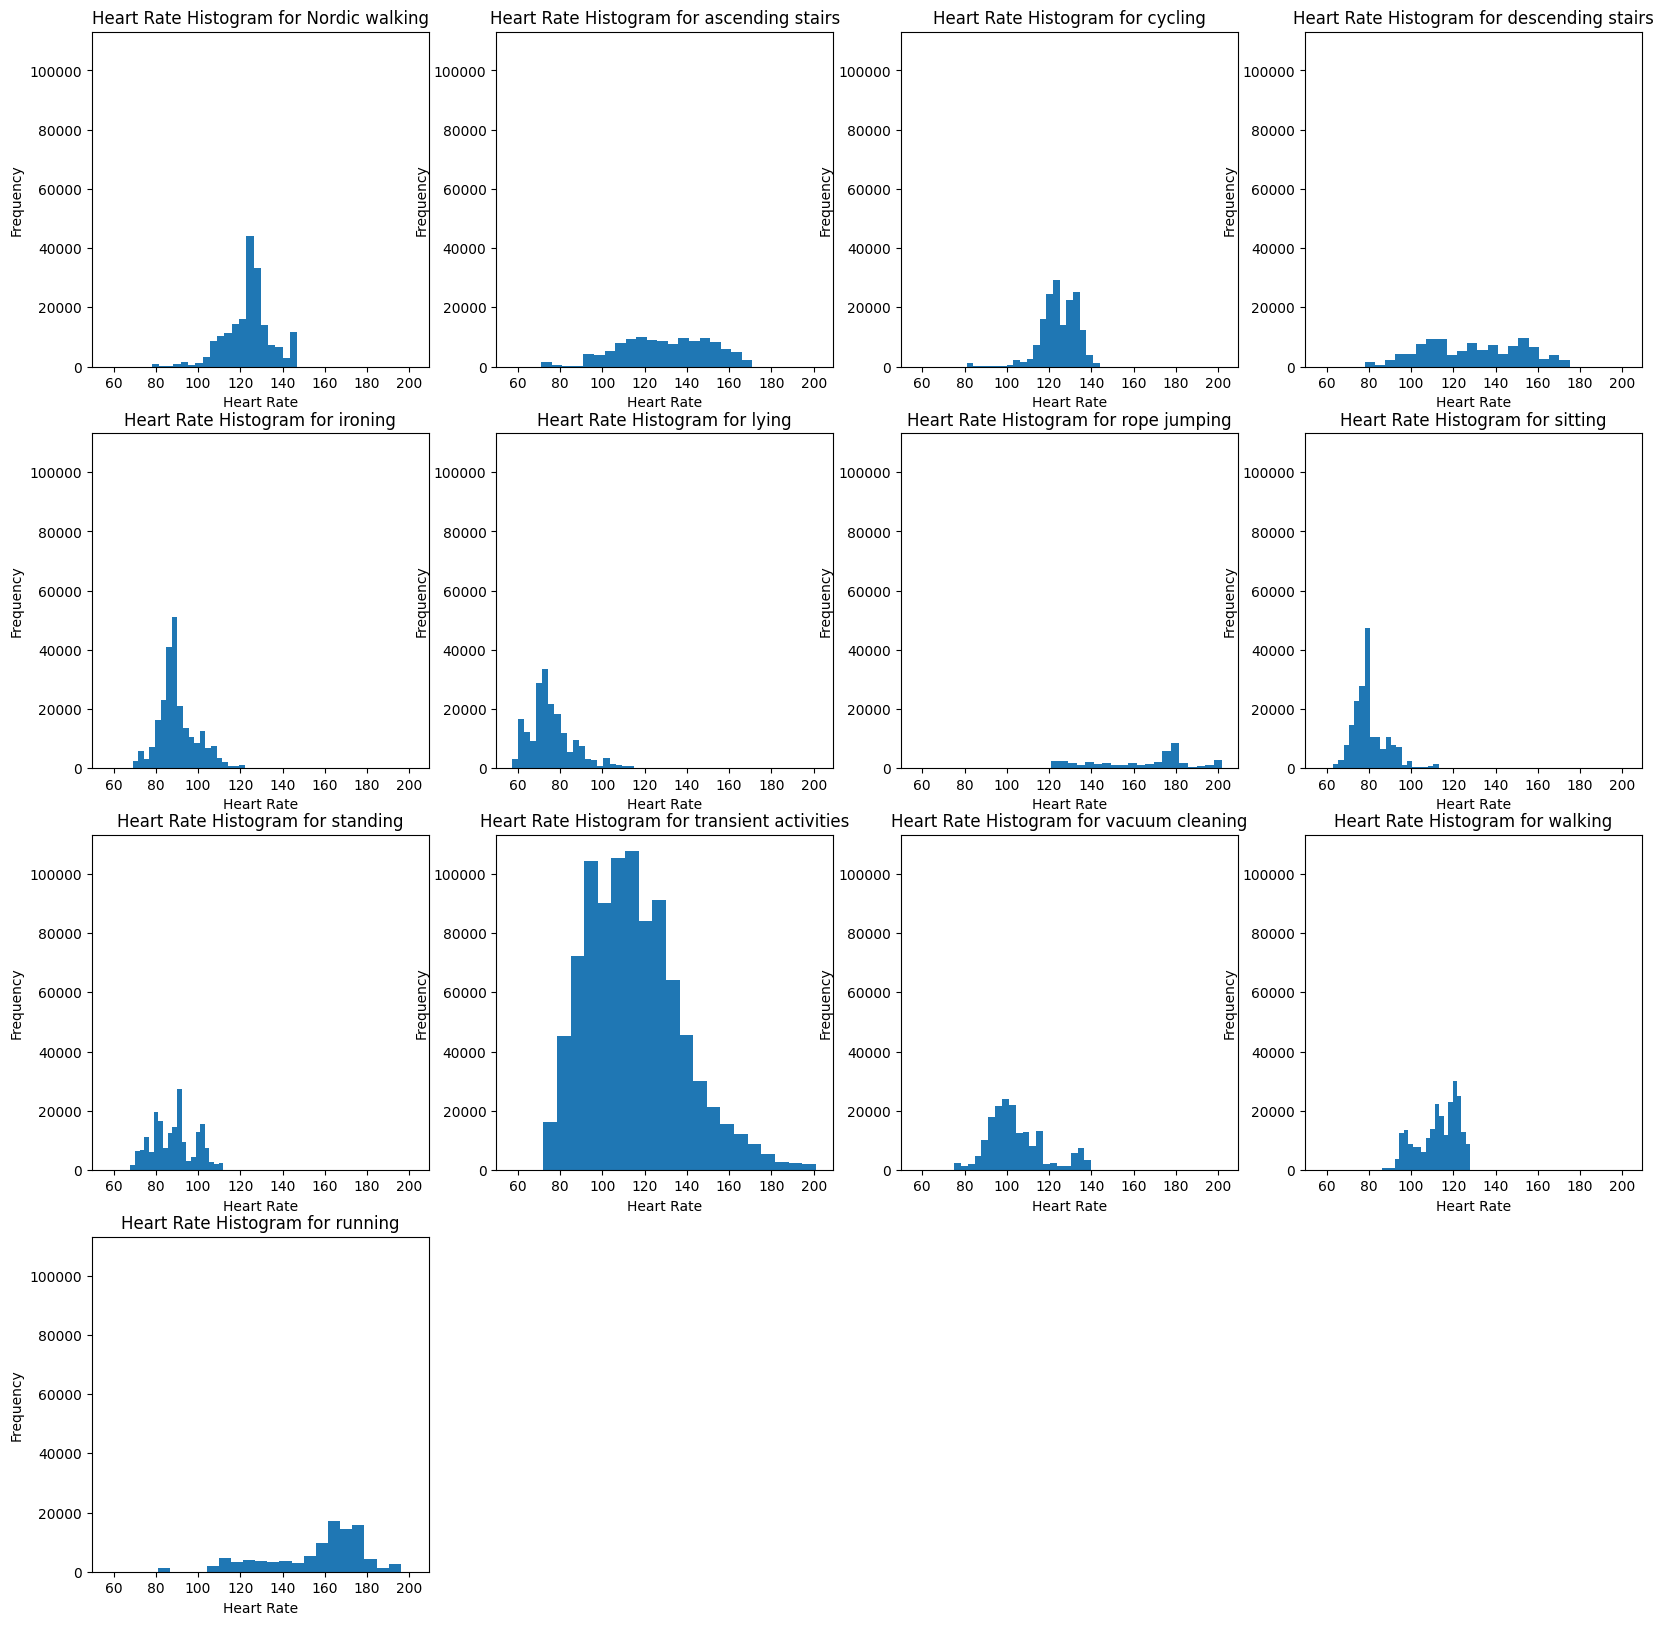

In [10]:
#plot subplot of histogram of heart rate for every activity
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
plt.hist(data[data["activityID"]=="Nordic walking"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for Nordic walking")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
#make all subplot share same y and x axis
plt.subplot(4,4,2,sharey=plt.subplot(4,4,1),sharex=plt.subplot(4,4,1))
plt.hist(data[data["activityID"]=="ascending stairs"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for ascending stairs")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,3,sharey=plt.subplot(4,4,1),sharex=plt.subplot(4,4,1))
plt.hist(data[data["activityID"]=="cycling"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for cycling")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.xlabel("Heart Rate")
plt.subplot(4,4,4,sharey=plt.subplot(4,4,1),sharex=plt.subplot(4,4,1))
plt.hist(data[data["activityID"]=="descending stairs"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for descending stairs")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,5,sharey=plt.subplot(4,4,1),sharex=plt.subplot(4,4,1))
plt.hist(data[data["activityID"]=="ironing"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for ironing")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,6,sharey=plt.subplot(4,4,1),sharex=plt.subplot(4,4,1))
plt.hist(data[data["activityID"]=="lying"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for lying")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,7,sharey=plt.subplot(4,4,1),sharex=plt.subplot(4,4,1))
plt.hist(data[data["activityID"]=="rope jumping"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for rope jumping")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,8,sharey=plt.subplot(4,4,1),sharex=plt.subplot(4,4,1))
plt.hist(data[data["activityID"]=="sitting"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for sitting")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,9,sharey=plt.subplot(4,4,1),sharex=plt.subplot(4,4,1))
plt.hist(data[data["activityID"]=="standing"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for standing")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,10,sharey=plt.subplot(4,4,1),sharex=plt.subplot(4,4,1))
plt.hist(data[data["activityID"]=="transient activities"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for transient activities")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,11,sharey=plt.subplot(4,4,1),sharex=plt.subplot(4,4,1))
plt.hist(data[data["activityID"]=="vacuum cleaning"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for vacuum cleaning")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,12,sharey=plt.subplot(4,4,1),sharex=plt.subplot(4,4,1))
plt.hist(data[data["activityID"]=="walking"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for walking")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,13,sharey=plt.subplot(4,4,1),sharex=plt.subplot(4,4,1))
plt.hist(data[data["activityID"]=="running"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for running")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")



"""
plt.subplot(4,4,2)
plt.hist(data[data["activityID"]=="ascending stairs"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for ascending stairs")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,3)
plt.hist(data[data["activityID"]=="cycling"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for cycling")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,4)
plt.hist(data[data["activityID"]=="descending stairs"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for descending stairs")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,5)
plt.hist(data[data["activityID"]=="ironing"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for ironing")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,6)
plt.hist(data[data["activityID"]=="lying"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for lying")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,7)
plt.hist(data[data["activityID"]=="rope jumping"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for rope jumping")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,8)
plt.hist(data[data["activityID"]=="sitting"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for sitting")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,9)
plt.hist(data[data["activityID"]=="standing"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for standing")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,10)
plt.hist(data[data["activityID"]=="transient activities"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for transient activities")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,11)
plt.hist(data[data["activityID"]=="vacuum cleaning"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for vacuum cleaning")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,12)
plt.hist(data[data["activityID"]=="walking"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for walking")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.subplot(4,4,13)
plt.hist(data[data["activityID"]=="running"]["heart_rate"],bins=20)
plt.title("Heart Rate Histogram for running")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")

plt.show()
"""



Text(0, 0.5, 'Frequency')

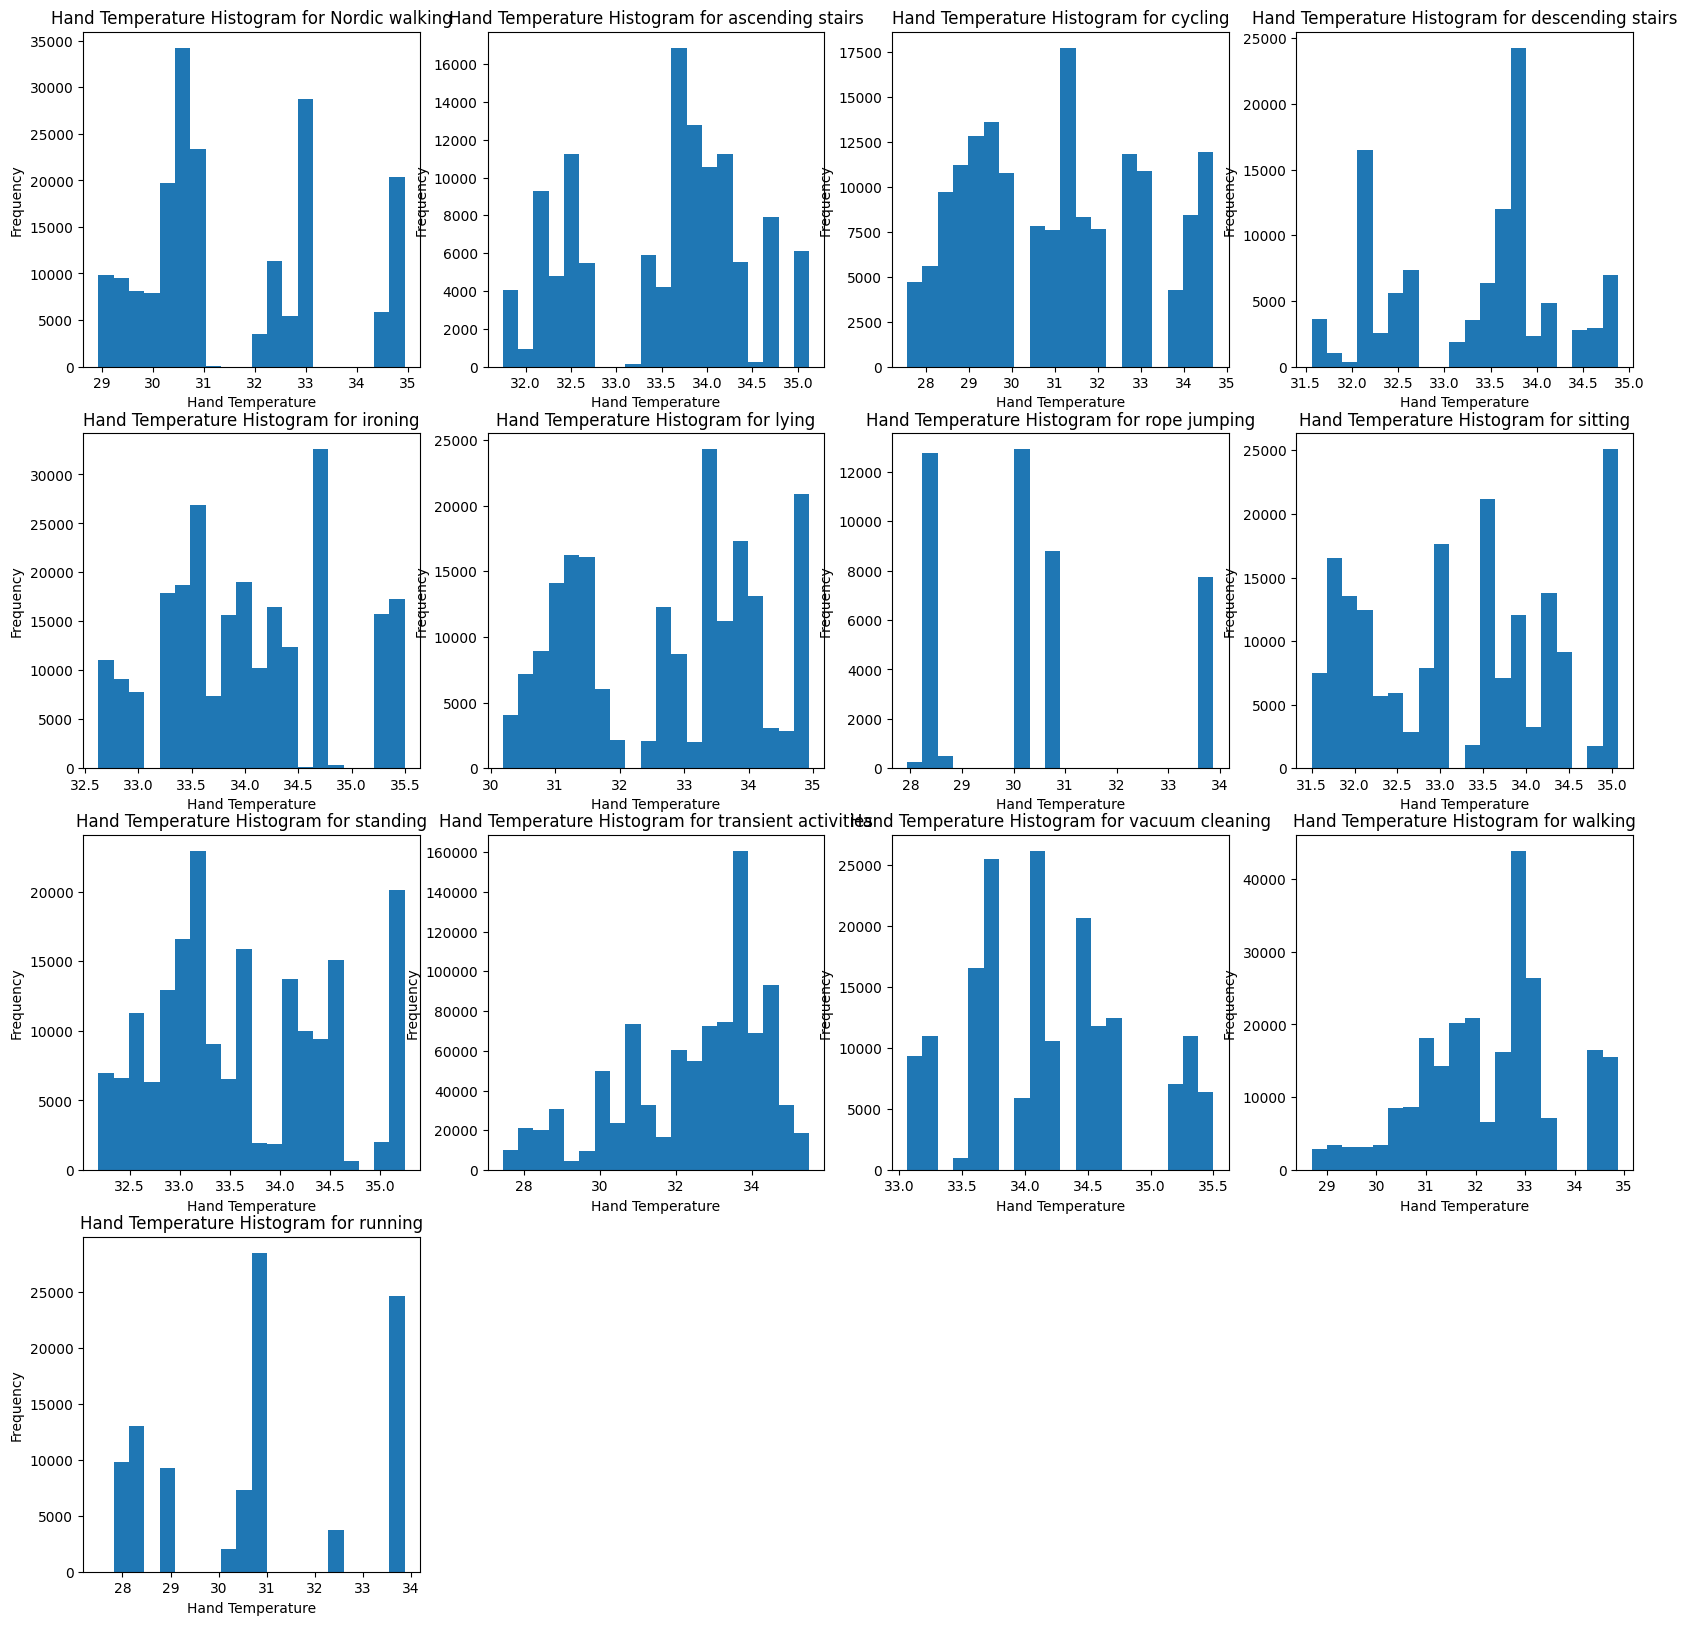

In [14]:
#do the same thing for hand temperature 
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
plt.hist(data[data["activityID"]=="Nordic walking"]["hand temperature (°C)"],bins=20)
plt.title("Hand Temperature Histogram for Nordic walking")
plt.xlabel("Hand Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,2)
plt.hist(data[data["activityID"]=="ascending stairs"]["hand temperature (°C)"],bins=20)
plt.title("Hand Temperature Histogram for ascending stairs")
plt.xlabel("Hand Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,3)
plt.hist(data[data["activityID"]=="cycling"]["hand temperature (°C)"],bins=20)
plt.title("Hand Temperature Histogram for cycling")
plt.xlabel("Hand Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,4)
plt.hist(data[data["activityID"]=="descending stairs"]["hand temperature (°C)"],bins=20)
plt.title("Hand Temperature Histogram for descending stairs")
plt.xlabel("Hand Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,5)
plt.hist(data[data["activityID"]=="ironing"]["hand temperature (°C)"],bins=20)
plt.title("Hand Temperature Histogram for ironing")
plt.xlabel("Hand Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,6)
plt.hist(data[data["activityID"]=="lying"]["hand temperature (°C)"],bins=20)
plt.title("Hand Temperature Histogram for lying")
plt.xlabel("Hand Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,7)
plt.hist(data[data["activityID"]=="rope jumping"]["hand temperature (°C)"],bins=20)
plt.title("Hand Temperature Histogram for rope jumping")
plt.xlabel("Hand Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,8)
plt.hist(data[data["activityID"]=="sitting"]["hand temperature (°C)"],bins=20)
plt.title("Hand Temperature Histogram for sitting")
plt.xlabel("Hand Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,9)
plt.hist(data[data["activityID"]=="standing"]["hand temperature (°C)"],bins=20)
plt.title("Hand Temperature Histogram for standing")
plt.xlabel("Hand Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,10)
plt.hist(data[data["activityID"]=="transient activities"]["hand temperature (°C)"],bins=20)
plt.title("Hand Temperature Histogram for transient activities")
plt.xlabel("Hand Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,11)
plt.hist(data[data["activityID"]=="vacuum cleaning"]["hand temperature (°C)"],bins=20)
plt.title("Hand Temperature Histogram for vacuum cleaning")
plt.xlabel("Hand Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,12)
plt.hist(data[data["activityID"]=="walking"]["hand temperature (°C)"],bins=20)
plt.title("Hand Temperature Histogram for walking")
plt.xlabel("Hand Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,13)
plt.hist(data[data["activityID"]=="running"]["hand temperature (°C)"],bins=20)
plt.title("Hand Temperature Histogram for running")
plt.xlabel("Hand Temperature")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

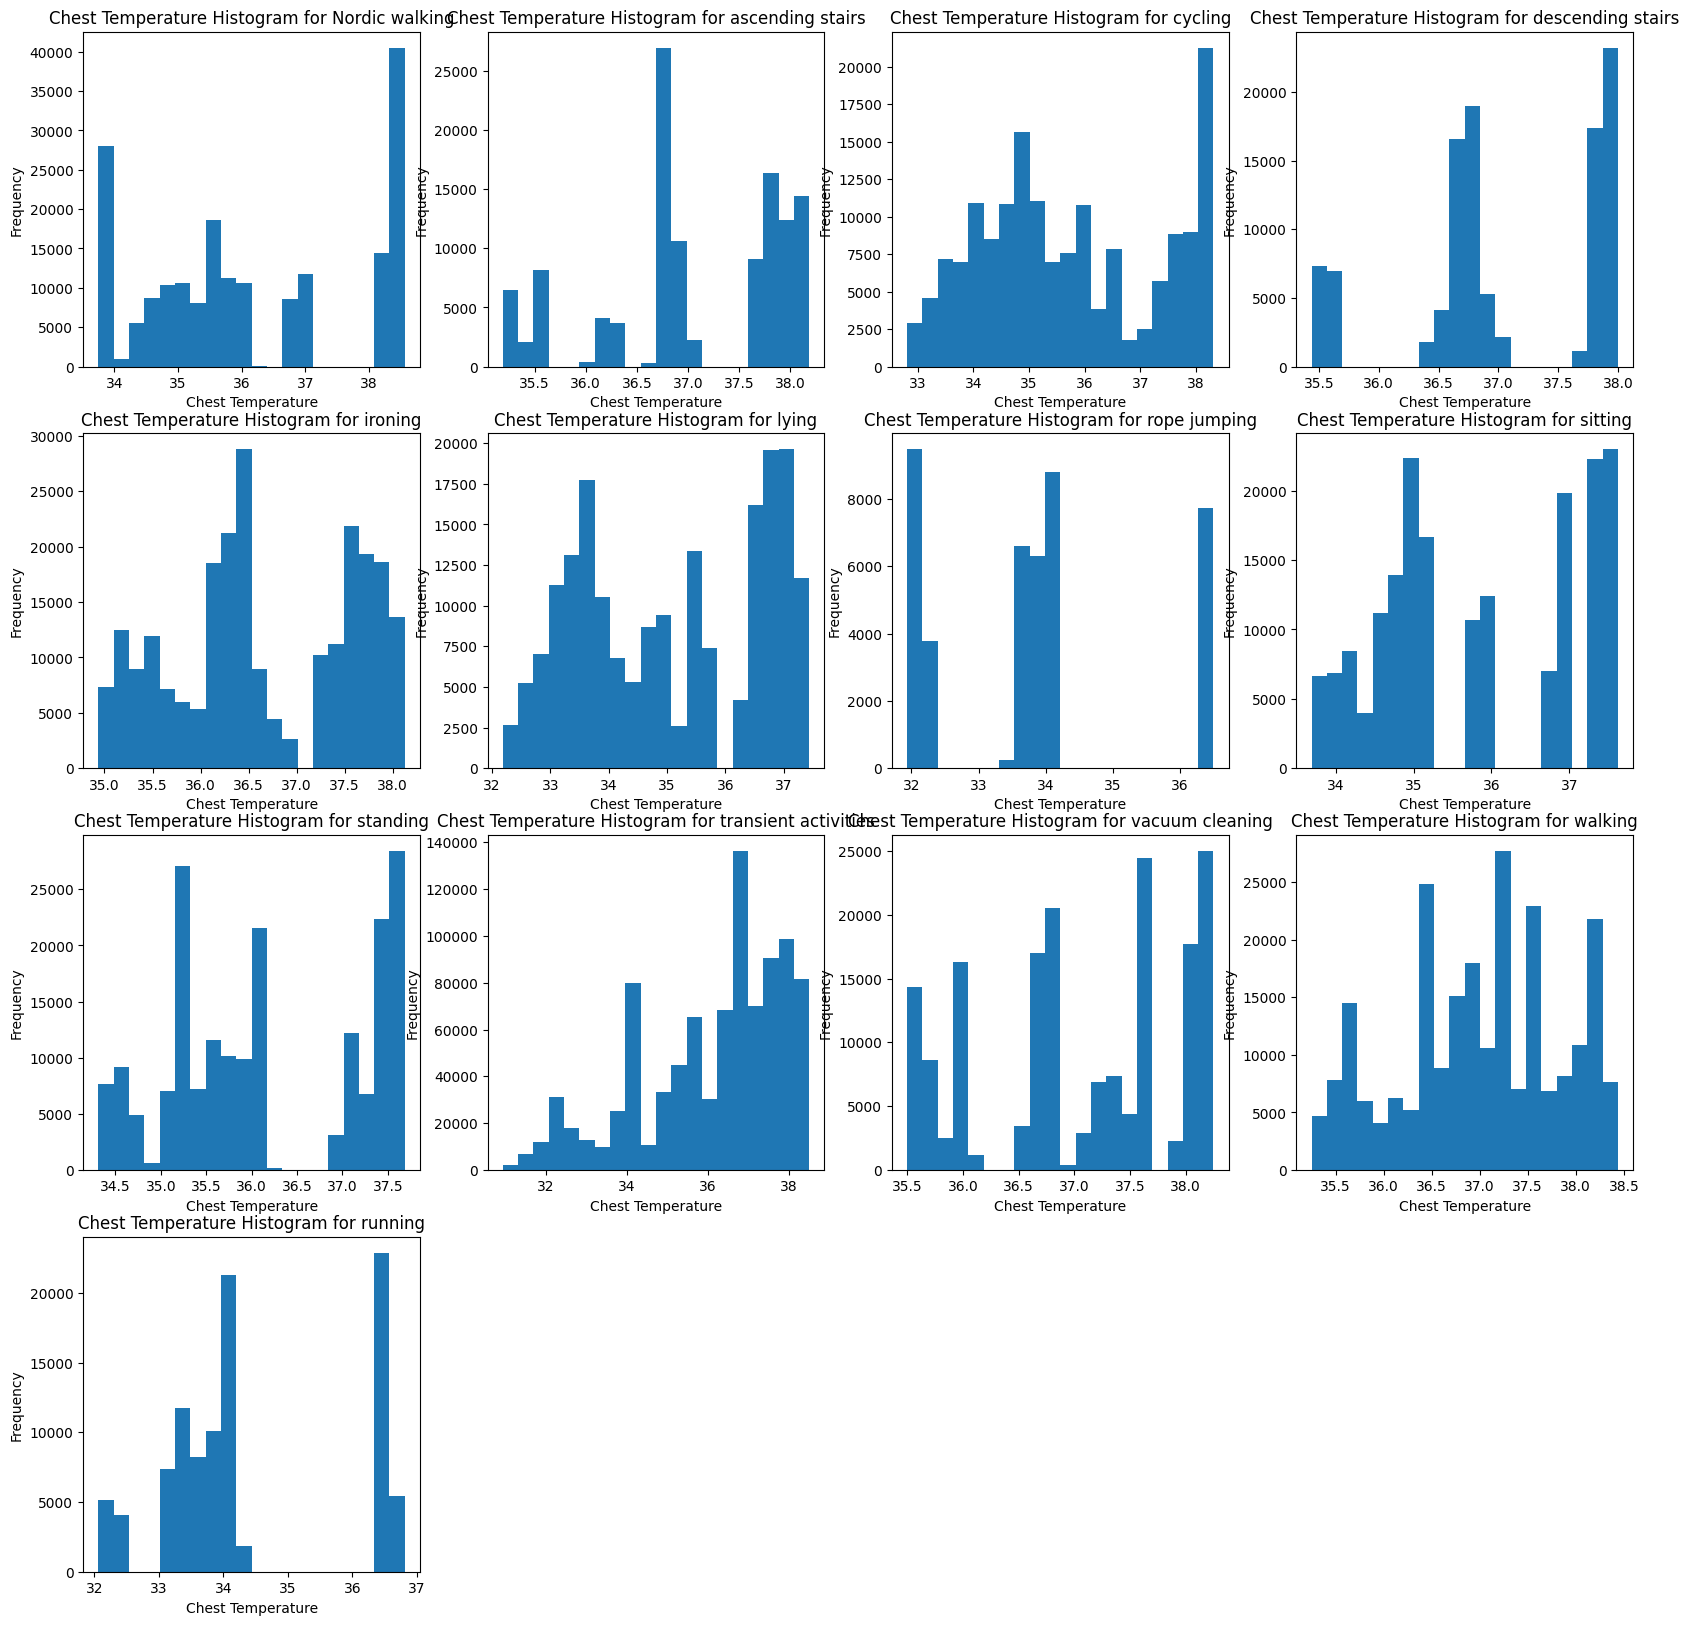

In [13]:
#do the same thing for hand temperature 
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
plt.hist(data[data["activityID"]=="Nordic walking"]["chest temperature (°C)"],bins=20)
plt.title("Chest Temperature Histogram for Nordic walking")
plt.xlabel("Chest Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,2)
plt.hist(data[data["activityID"]=="ascending stairs"]["chest temperature (°C)"],bins=20)
plt.title("Chest Temperature Histogram for ascending stairs")
plt.xlabel("Chest Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,3)
plt.hist(data[data["activityID"]=="cycling"]["chest temperature (°C)"],bins=20)
plt.title("Chest Temperature Histogram for cycling")
plt.xlabel("Chest Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,4)
plt.hist(data[data["activityID"]=="descending stairs"]["chest temperature (°C)"],bins=20)
plt.title("Chest Temperature Histogram for descending stairs")
plt.xlabel("Chest Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,5)
plt.hist(data[data["activityID"]=="ironing"]["chest temperature (°C)"],bins=20)
plt.title("Chest Temperature Histogram for ironing")
plt.xlabel("Chest Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,6)
plt.hist(data[data["activityID"]=="lying"]["chest temperature (°C)"],bins=20)
plt.title("Chest Temperature Histogram for lying")
plt.xlabel("Chest Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,7)
plt.hist(data[data["activityID"]=="rope jumping"]["chest temperature (°C)"],bins=20)
plt.title("Chest Temperature Histogram for rope jumping")
plt.xlabel("Chest Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,8)
plt.hist(data[data["activityID"]=="sitting"]["chest temperature (°C)"],bins=20)
plt.title("Chest Temperature Histogram for sitting")
plt.xlabel("Chest Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,9)
plt.hist(data[data["activityID"]=="standing"]["chest temperature (°C)"],bins=20)
plt.title("Chest Temperature Histogram for standing")
plt.xlabel("Chest Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,10)
plt.hist(data[data["activityID"]=="transient activities"]["chest temperature (°C)"],bins=20)
plt.title("Chest Temperature Histogram for transient activities")
plt.xlabel("Chest Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,11)
plt.hist(data[data["activityID"]=="vacuum cleaning"]["chest temperature (°C)"],bins=20)
plt.title("Chest Temperature Histogram for vacuum cleaning")
plt.xlabel("Chest Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,12)
plt.hist(data[data["activityID"]=="walking"]["chest temperature (°C)"],bins=20)
plt.title("Chest Temperature Histogram for walking")
plt.xlabel("Chest Temperature")
plt.ylabel("Frequency")
plt.subplot(4,4,13)
plt.hist(data[data["activityID"]=="running"]["chest temperature (°C)"],bins=20)
plt.title("Chest Temperature Histogram for running")
plt.xlabel("Chest Temperature")
plt.ylabel("Frequency")




In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data=pd.read_csv('dataset2.csv')
data=data.dropna()

#sample 20 percent of data
data=data.sample(frac=0.05)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143200 entries, 2644752 to 2772706
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   activityID                 143200 non-null  object 
 1   heart_rate                 143200 non-null  float64
 2   hand temperature (°C)      143200 non-null  float64
 3   hand acceleration X ±16g   143200 non-null  float64
 4   hand acceleration Y ±16g   143200 non-null  float64
 5   hand acceleration Z ±16g   143200 non-null  float64
 6   hand gyroscope X           143200 non-null  float64
 7   hand gyroscope Y           143200 non-null  float64
 8   hand gyroscope Z           143200 non-null  float64
 9   hand magnetometer X        143200 non-null  float64
 10  hand magnetometer Y        143200 non-null  float64
 11  hand magnetometer Z        143200 non-null  float64
 12  chest temperature (°C)     143200 non-null  float64
 13  chest acceleration X ±

In [17]:
y=data["activityID"]
X=data.drop(["activityID"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#build the model
model=SVC()
model.fit(X_train,y_train)

#predict the model
y_pred=model.predict(X_test)
print(y_pred)
print(y_test)
#check the accuracy
print(accuracy_score(y_test,y_pred))

#check confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

['transient activities' 'walking' 'vacuum cleaning' ...
 'transient activities' 'ironing' 'ascending stairs']
1910402    transient activities
1226530        ascending stairs
506376          vacuum cleaning
577134     transient activities
303950                  cycling
                   ...         
2055138          Nordic walking
959671          vacuum cleaning
554388         ascending stairs
1178917                 ironing
368550     transient activities
Name: activityID, Length: 42960, dtype: object
0.8041201117318436
[[ 2111    25     1     4     6     0     0     5     0     0   591     0
     95]
 [   62   573     3    20    15     0     1     2     1     4   983    19
    121]
 [   28     1  2237     2     6     0     0     0     0     0   163     0
      3]
 [   16    74    29   267    21     0     5     7     0    13  1050     4
     55]
 [    0     0    12     1  3355     0     0     0     0    61    99     9
      0]
 [    0     0     0     0     1  2808     0     0     1  

In [18]:
#save svm model 
import pickle
filename = 'svm_model.pkl'
pickle.dump(model, open(filename, 'wb'))


In [19]:
with open('svm_model.pkl', 'rb') as f:
    clf = pickle.load(f)

0.8041201117318436
                      precision    recall  f1-score   support

      Nordic walking       0.80      0.74      0.77      2838
    ascending stairs       0.71      0.32      0.44      1804
             cycling       0.93      0.92      0.92      2440
   descending stairs       0.81      0.17      0.29      1541
             ironing       0.88      0.95      0.91      3537
               lying       1.00      0.96      0.98      2933
        rope jumping       0.87      0.73      0.80       634
             running       0.96      0.75      0.84      1499
             sitting       0.95      0.92      0.94      2691
            standing       0.83      0.92      0.87      2850
transient activities       0.70      0.87      0.78     13936
     vacuum cleaning       0.87      0.59      0.70      2658
             walking       0.79      0.76      0.78      3599

            accuracy                           0.80     42960
           macro avg       0.85      0.74      0.

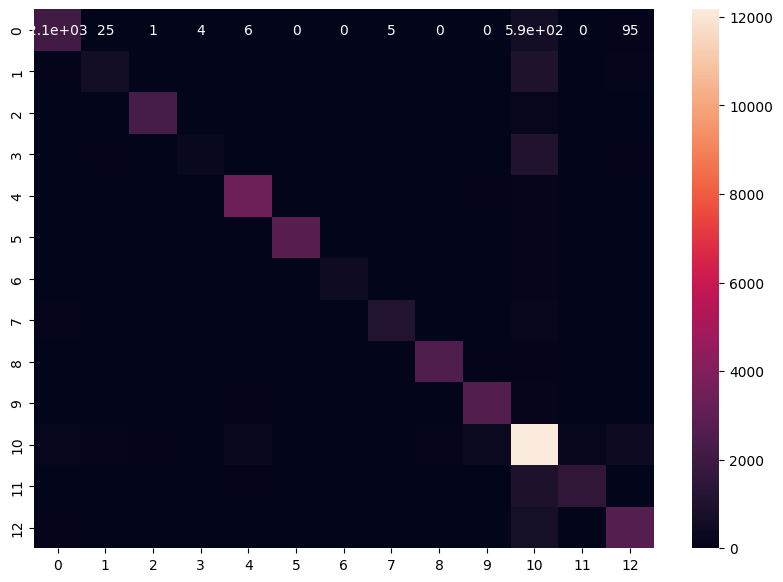

In [21]:
#use clf to make a prediction
print(accuracy_score(y_test,y_pred))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test,y_pred), annot=True)

print(classification_report(y_test,y_pred))

In [31]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [32]:
import pickle
filename = 'knn_model.pkl'
pickle.dump(neigh, open(filename, 'wb'))

In [33]:
with open('knn_model.pkl', 'rb') as f:
    clf = pickle.load(f)

#use clf to make a prediction
y_pred_knn=clf.predict(X_test)
print(accuracy_score(y_test,y_pred_knn))



0.938780260707635


                      precision    recall  f1-score   support

      Nordic walking       0.87      0.94      0.91      2838
    ascending stairs       0.82      0.82      0.82      1804
             cycling       0.97      0.99      0.98      2440
   descending stairs       0.86      0.71      0.78      1541
             ironing       0.97      0.99      0.98      3537
               lying       1.00      0.99      1.00      2933
        rope jumping       0.97      0.94      0.95       634
             running       0.98      0.94      0.96      1499
             sitting       0.99      0.99      0.99      2691
            standing       0.98      0.99      0.98      2850
transient activities       0.94      0.93      0.93     13936
     vacuum cleaning       0.96      0.94      0.95      2658
             walking       0.87      0.93      0.90      3599

            accuracy                           0.94     42960
           macro avg       0.94      0.93      0.93     42960
      

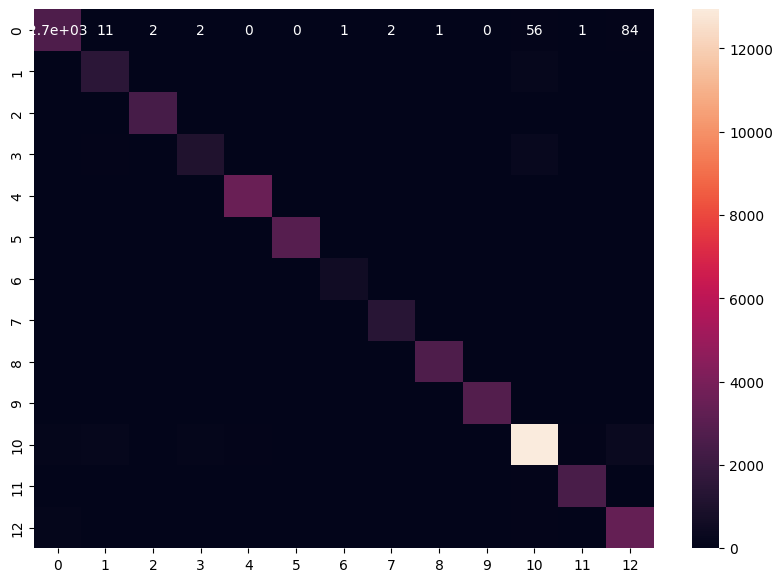

In [35]:
#plot the confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test,y_pred_knn), annot=True)

#print the classification report 
print(classification_report(y_test,y_pred_knn))
